In [87]:

import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import statsmodels.api as stm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import time as time
import itertools
%matplotlib inline

#Reads csv file for real estate information
insurance = pd.read_csv(r"C:\Users\Bruker\Koding2\insurance.csv")

#Produces first ten rows of data
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [88]:

#Produces last ten rows of data
insurance.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [89]:

# Drop categorical column, load a list of the column headers
columns = list(pd.read_csv(r"C:\Users\Bruker\Koding2\insurance.csv", nrows=1))
print(columns)

# Read the file using only the first 14 columns
insurance = pd.read_csv(r"C:\Users\Bruker\Koding2\insurance.csv", usecols = [i for i in range(7)])
insurance.head(10)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [90]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [91]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


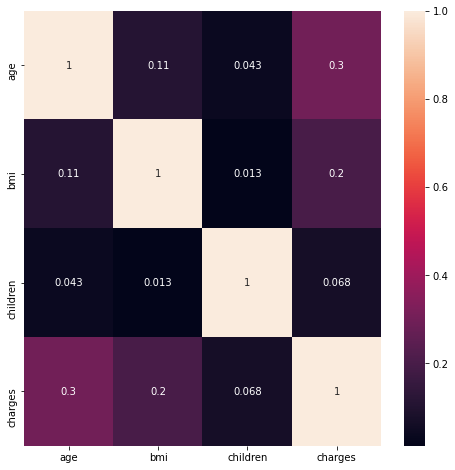

In [92]:
plt.figure(figsize=(8, 8))
correlation_matrix = insurance.corr().round(4)
sbn.heatmap(data = correlation_matrix, annot = True)
plt.savefig('corr.png')

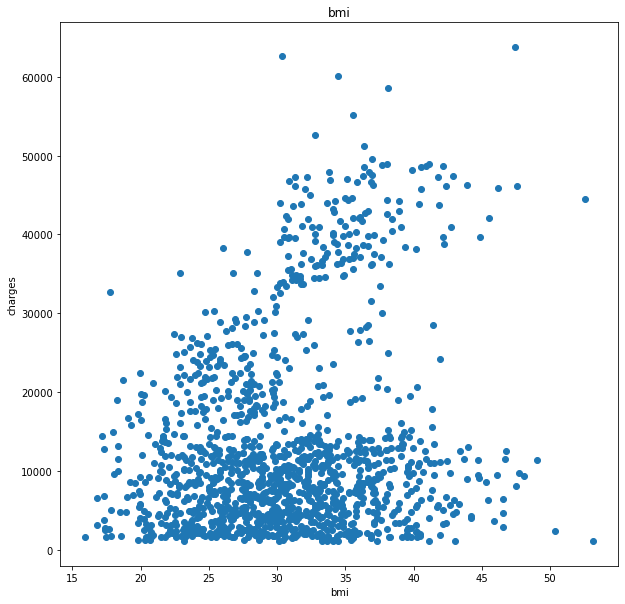

In [93]:

plt.figure(figsize=(10, 10))

for i, col in enumerate(['bmi']):
    plt.subplot(1, len(['bmi']) , i+1)
    x = insurance[col]
    y = insurance['charges']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('charges')
    
plt.savefig('linear1.png')

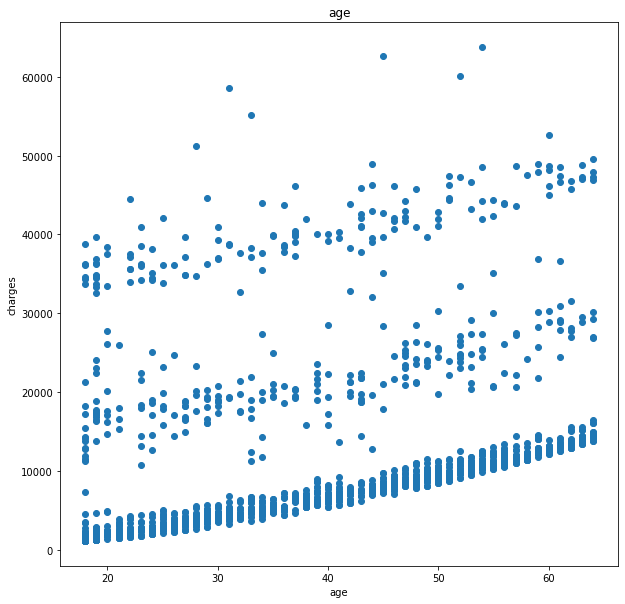

In [94]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(['age']):
    plt.subplot(1, len(['age']) , i+1)
    x = insurance[col]
    y = insurance['charges']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('charges')
    
plt.savefig('linear2.png')

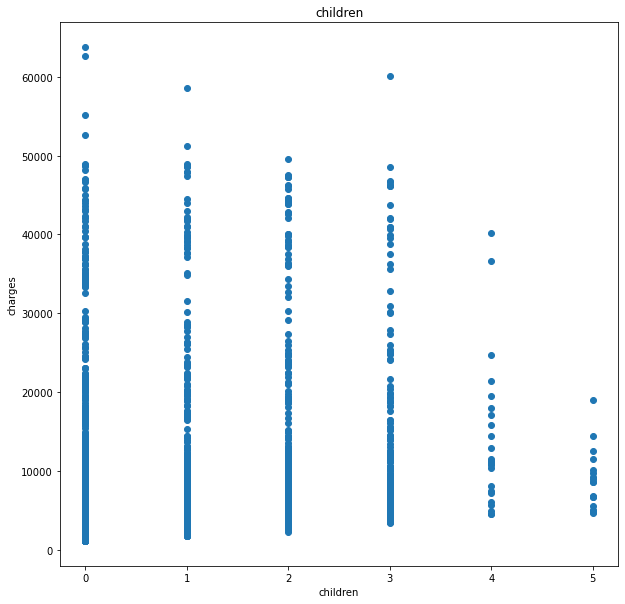

In [95]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(['children']):
    plt.subplot(1, len(['children']) , i+1)
    x = insurance[col]
    y = insurance['charges']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('charges')
    
plt.savefig('linear3.png')

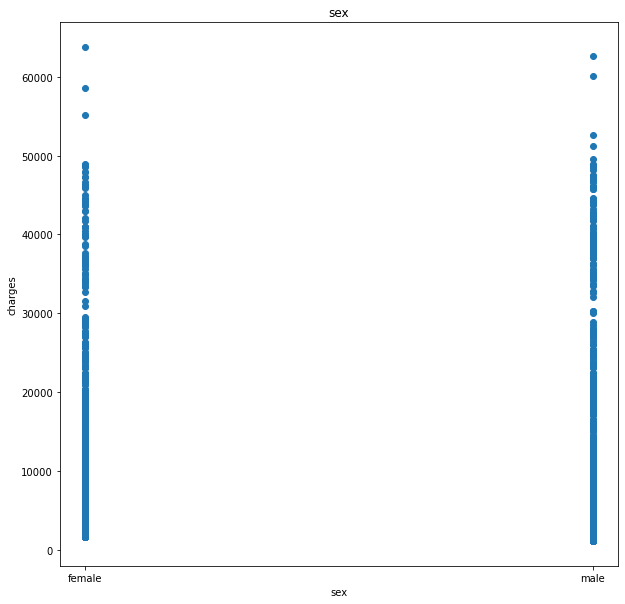

In [96]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(['sex']):
    plt.subplot(1, len(['sex']) , i+1)
    x = insurance[col]
    y = insurance['charges']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('charges')
    
plt.savefig('linear4.png')

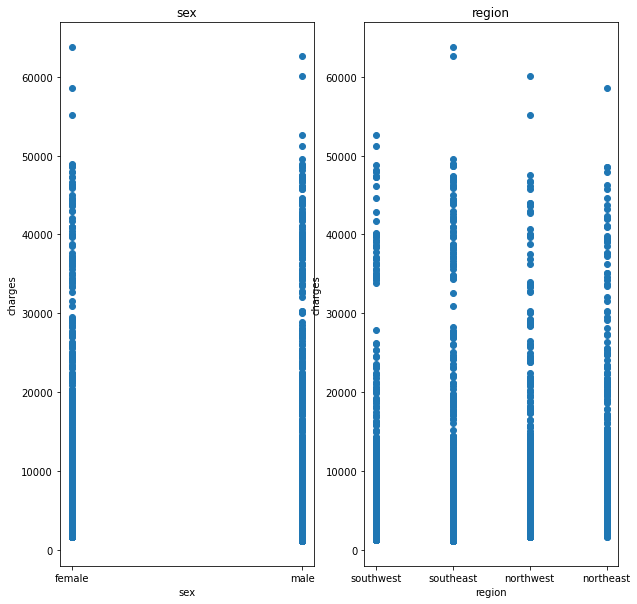

In [97]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(['sex', 'region']):
    plt.subplot(1, len(['sex', 'region']) , i+1)
    x = insurance[col]
    y = insurance['charges']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('charges')
    
plt.savefig('linear5.png')

In [102]:
df1 = insurance.copy()
df1 = pd.get_dummies(df1,
                     columns = ['sex', 'smoker','region'])

In [104]:
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.6, test_size = 0.4, random_state = 100)
df_train.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1025,21,34.600,0,2020.17700,1,0,1,0,0,0,0,1
253,27,30.300,3,4260.74400,0,1,1,0,0,0,0,1
359,18,20.790,0,1607.51010,1,0,1,0,0,0,1,0
1231,20,21.800,0,20167.33603,1,0,0,1,0,0,0,1
1176,52,24.130,1,23887.66270,1,0,0,1,0,1,0,0
1012,61,33.330,4,36580.28216,1,0,1,0,0,0,1,0
1145,52,32.775,3,11289.10925,0,1,1,0,0,1,0,0
272,41,37.050,2,7265.70250,0,1,1,0,0,1,0,0
117,29,27.940,1,19107.77960,1,0,0,1,0,0,1,0
264,53,38.060,3,20462.99766,1,0,1,0,0,0,1,0


In [105]:
df_train.tail(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
912,59,26.695,3,14382.70905,1,0,1,0,0,1,0,0
1252,20,27.300,0,16232.84700,0,1,0,1,0,0,0,1
280,40,28.120,1,22331.56680,1,0,0,1,1,0,0,0
752,64,37.905,0,14210.53595,0,1,1,0,0,1,0,0
1009,51,27.740,1,9957.72160,0,1,1,0,1,0,0,0
802,21,22.300,1,2103.08000,0,1,1,0,0,0,0,1
53,36,34.430,0,37742.57570,0,1,0,1,0,0,1,0
350,57,23.180,0,11830.60720,1,0,1,0,0,1,0,0
79,41,32.965,0,6571.02435,1,0,1,0,0,1,0,0
792,22,23.180,0,2731.91220,1,0,1,0,1,0,0,0


In [106]:
#Start Building the Model
# Dividing the training data set into independent variables and outcome or target variable
df_train
y_train = df_train.pop('charges')
x_train = df_train

#uses the statistical models api stm
#uses https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
x_train_lm = stm.add_constant(x_train)

Linear_Regression_Model= stm.OLS(y_train, x_train_lm).fit()

Linear_Regression_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     318.6
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          9.61e-242
Time:                        03:41:16   Log-Likelihood:                -8127.7
No. Observations:                 802   AIC:                         1.627e+04
Df Residuals:                     793   BIC:                         1.632e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              422.5978    552.479      0.765      0.445    -661.897    1507.093
age                266.9334     15.481     17.243      0.000     236.545     297.322
bmi                291.2095     37.014      7.868      0.000     218.552     363.867
children           409.8477    180.840      2.266      0.024      54.866     764.830
sex_female          21.6992    342.681      0.063      0.950    -650.969     694.368
sex_male           400.8986    359.973      1.114      0.266    -305.714    1107.511
smoker_no        -1.218e+04    358.924    -33.922      0.000   -1.29e+04   -1.15e+04
smoker_yes         1.26e+04    413.934     30.435      0.000    1.18e+04    1.34e+04
region_northeast   926.1612    399.765      2.317      0.021     141.439    1710.883
region_northwest   110.4718    396.324      0.279      0.781    -667.496     888.439
region_southeast   -87.1837    428.401     -0.204      0.839    -928.117     753.750
region_southwest  -526.8515    405.307     -1.300      0.194   -1322.454     268.751
==============================================================================
Omnibus:                      181.600   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.348
Skew:                           1.175   Prob(JB):                     3.60e-99
Kurtosis:                       5.836   Cond. No.                     1.06e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [107]:
#Building the Model
# Split the training data set into independent variables and outcome or target variable
print ("y_train: ",y_train)
print()
print()
print (" x_train: ", x_train)

y_train:  1025     2020.17700
253      4260.74400
359      1607.51010
1231    20167.33603
1176    23887.66270
           ...     
802      2103.08000
53      37742.57570
350     11830.60720
79       6571.02435
792      2731.91220
Name: charges, Length: 802, dtype: float64


 x_train:        age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
1025   21  34.600         0           1         0          1           0   
253    27  30.300         3           0         1          1           0   
359    18  20.790         0           1         0          1           0   
1231   20  21.800         0           1         0          0           1   
1176   52  24.130         1           1         0          0           1   
...   ...     ...       ...         ...       ...        ...         ...   
802    21  22.300         1           0         1          1           0   
53     36  34.430         0           0         1          0           1   
350    57  23.180         0   

In [108]:
#uses the statistical models api stm
#uses https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
x_train_lm = stm.add_constant(x_train)

Linear_Regression_Model= stm.OLS(y_train,x_train_lm).fit()

Linear_Regression_Model.summary()
print(x_train.columns)

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [109]:
#Argument: A subset of features, Returns: A model with associated Adjusted R-Squared Value
def processSubset(feature_set):
    L_R_Model= stm.OLS(y_train,x_train_lm[list(feature_set)])
    rm=L_R_Model.fit()
    r_squared=rm.rsquared_adj
    #print("Model: ", rm, "Adjusted R-Squared: ", r_squared)
    return {"Model":rm, "Adjusted R-Squared":r_squared}

In [110]:
#Returns the best model with k features by comparing Adjusted R-Squared

def getBest(k):
    
    start_time = time.time()
    
    results = []
    #for combo in itertools.combinations(X.columns, k):
    x_train_ca = stm.add_constant(x_train)
    for combo in itertools.combinations(x_train_ca.columns, k): 
        results.append(processSubset(combo))
    models = pd.DataFrame(results)
   
    # Choose the model with the highest Adjusted R-Squared
    best_model = models.loc[models['Adjusted R-Squared'].argmax()]
    
    end_time = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (end_time-start_time), "seconds.")
    
    return best_model

In [112]:
#Creates a DataFrame with the best model with each number of predictors

model_dFrame = pd.DataFrame(columns=["Adjusted R-Squared", "Model"])

start_time = time.time()
for i in range(1,7):
    model_dFrame.loc[i] = getBest(i)
    #print(model_dFrame.loc[i])
end_time = time.time()
print("Elapsed time:", (end_time-start_time), "seconds.")

Processed 12 models on 1 predictors in 0.04293990135192871 seconds.
Processed 66 models on 2 predictors in 0.2944324016571045 seconds.
Processed 220 models on 3 predictors in 0.8927929401397705 seconds.
Processed 495 models on 4 predictors in 2.1634459495544434 seconds.
Processed 792 models on 5 predictors in 3.4046170711517334 seconds.
Processed 924 models on 6 predictors in 4.097724914550781 seconds.
Elapsed time: 11.063352823257446 seconds.


In [113]:
for i in range(1,7):
        print("\n\nBest model with ",i," features\n\n")
        #print(model_dFrame.loc[i, "Model"].summary())
        print(model_dFrame.loc[i, "Adjusted R-Squared"])
        print(model_dFrame.loc[i, "Model"].params)




Best model with  1  features


0.6615288557564594
smoker_yes    33306.247621
dtype: float64


Best model with  2  features


0.8760409099959953
age             224.694066
smoker_yes    24561.322055
dtype: float64


Best model with  3  features


0.8769723682522481
age             237.431173
sex_female    -1141.099940
smoker_yes    24597.171631
dtype: float64


Best model with  4  features


0.8774217424658016
age                   242.797094
sex_female          -1093.455848
smoker_yes          24602.399059
region_southwest    -1028.048196
dtype: float64


Best model with  5  features


0.8780414901922707
age                   250.860459
sex_female           -997.992504
smoker_yes          24573.560483
region_northwest    -1234.446301
region_southwest    -1393.980780
dtype: float64


Best model with  6  features


0.8784283427963419
age                   227.662574
bmi                    39.014406
sex_female          -1193.478731
smoker_yes          24391.507115
region_northwest    -1

In [114]:
#Manage our test parition
df_test
y_test = df_test.pop('charges')
x_test = df_test
y_test.head()

12      1826.84300
306    20177.67113
318     7421.19455
815     1877.92940
157    15518.18025
Name: charges, dtype: float64

In [116]:
#Drop the columns we don't want
#df = df.drop(columns=['column_nameA', 'column_nameB'])
x_train_1=x_train.drop(columns=['smoker_no','sex_male','region_northeast','region_southeast'])
x_test_1=x_test.drop(columns=['smoker_no','sex_male','region_northeast','region_southeast'])
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
print (x_train_1.head(0))
lr_model.fit(x_train_1,y_train) #THIS IS THE LINEAR REGRESSION

Empty DataFrame
Columns: [age, bmi, children, sex_female, smoker_yes, region_northwest, region_southwest]
Index: []


LinearRegression()

In [117]:
#Now let's print the coefficients in our linear equation, our model
print(lr_model.coef_)

#Run our model on the test data and get the predicted values for house price of unit area

y_test_pred = lr_model.predict(x_test_1)
print("\n\nx_test_1\n",x_test_1)

[  267.73944772   275.22847939   416.78843231  -403.99727159
 24719.46747574  -290.99796031  -900.96920654]


x_test_1
       age     bmi  children  sex_female  smoker_yes  region_northwest  \
12     23  34.400         0           0           0                 0   
306    28  27.500         2           1           0                 0   
318    44  27.645         0           1           0                 1   
815    20  31.460         0           1           0                 0   
157    18  25.175         0           0           1                 0   
...   ...     ...       ...         ...         ...               ...   
669    40  29.810         1           1           0                 0   
1110   54  32.300         1           1           0                 0   
52     48  28.000         1           0           1                 0   
830    63  33.100         0           0           0                 0   
1235   26  31.065         0           0           0                 1   

   

In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE: ",sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE:  6054.485935021668


In [119]:
#Make a list of our new data and convert it to a Pandas Dataframe
#Columns: [age, bmi, children, sex_female, smoker_yes, region_northwest, 'region_southwest']
new_person_data_list=[[35,29.882,1,0,0,1,0]]
new_df=pd.DataFrame(new_person_data_list,columns=['age', 'bmi', 'children', 'sex_female', 'smoker_yes', 'region_northwest', 'region_southwest'])

print(new_df)

charges_prediction=lr_model.predict(new_df)

print("The predicted real estate price in Taiwan based on that data is: ",charges_prediction)

   age     bmi  children  sex_female  smoker_yes  region_northwest  \
0   35  29.882         1           0           0                 1   

   region_southwest  
0                 0  
The predicted real estate price in Taiwan based on that data is:  [7221.55009709]


In [121]:
new_person_data_list=[[67,33.005,2,0,1,1,0]]
new_df2=pd.DataFrame(new_person_data_list,columns=['age', 'bmi', 'children', 'sex_female', 'smoker_yes', 'region_northwest', 'region_southwest'])

print(new_df2)

charges_prediction2=lr_model.predict(new_df2)

print("The predicted charges are: ",charges_prediction2)

   age     bmi  children  sex_female  smoker_yes  region_northwest  \
0   67  33.005         2           0           1                 1   

   region_southwest  
0                 0  
The predicted charges are:  [41785.00687323]
